# Crop Recommendation 

## Introduction


Welcome to the Crop Recommendation Notebook, a powerful tool designed to assist farmers and agricultural enthusiasts in making informed decisions about crop selection. This notebook leverages a comprehensive dataset featuring essential agricultural attributes, including nitrogen (N), phosphorus (P), potassium (K), temperature, humidity, pH levels, rainfall, and corresponding crop labels.

In the world of agriculture, understanding the interplay of these factors is crucial for optimizing crop yield and quality. The data provided in this notebook offers a valuable resource for developing predictive models that can recommend suitable crops based on specific environmental conditions.

Whether you are a seasoned farmer or someone exploring the fascinating realm of agriculture, this Crop Recommendation Notebook is your gateway to data-driven insights, helping you navigate the complex landscape of crop cultivation and enhance your decision-making process. Let's embark on a journey to unlock the potential of precision agriculture and cultivate a future of sustainable and efficient farming practices.

## Importing Necessary Libraries

In [1]:
# NumPy for numerical operations and array manipulation
import numpy as np

# Pandas for data manipulation and analysis using data frames
import pandas as pd

# Matplotlib for creating visualizations in Python
import matplotlib.pyplot as plt 

# Seaborn for statistical data visualization based on Matplotlib
import seaborn as sns

# MinMaxScaler from scikit-learn for scaling numerical features
from sklearn.preprocessing import MinMaxScaler

# train_test_split and cross_val_score from scikit-learn for dataset splitting and cross-validation
from sklearn.model_selection import train_test_split, cross_val_score
import warnings

# Ignore sklearn warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Various classification models from scikit-learn for machine learning tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Performance metrics such as accuracy_score and classification_report from scikit-learn
from sklearn.metrics import accuracy_score, classification_report

# The pickle module for saving and loading machine learning models
import pickle


## Loading and Exploring Data

In [2]:
crop_recommendation_data = pd.read_csv("../data/raw/crop_recommendation.csv")

In [3]:
crop_recommendation_data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
crop_recommendation_data.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [5]:
crop_recommendation_data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [6]:
crop_recommendation_data.size

17600

In [7]:
crop_recommendation_data.shape

(2200, 8)

In [8]:
crop_recommendation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
crop_recommendation_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
crop_recommendation_data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

## Data Visualization

Let's visualize the data

Pair Plot 

In [11]:
# Drop the 'label' column 
data_without_label = crop_recommendation_data.drop(["label"], axis = 1)

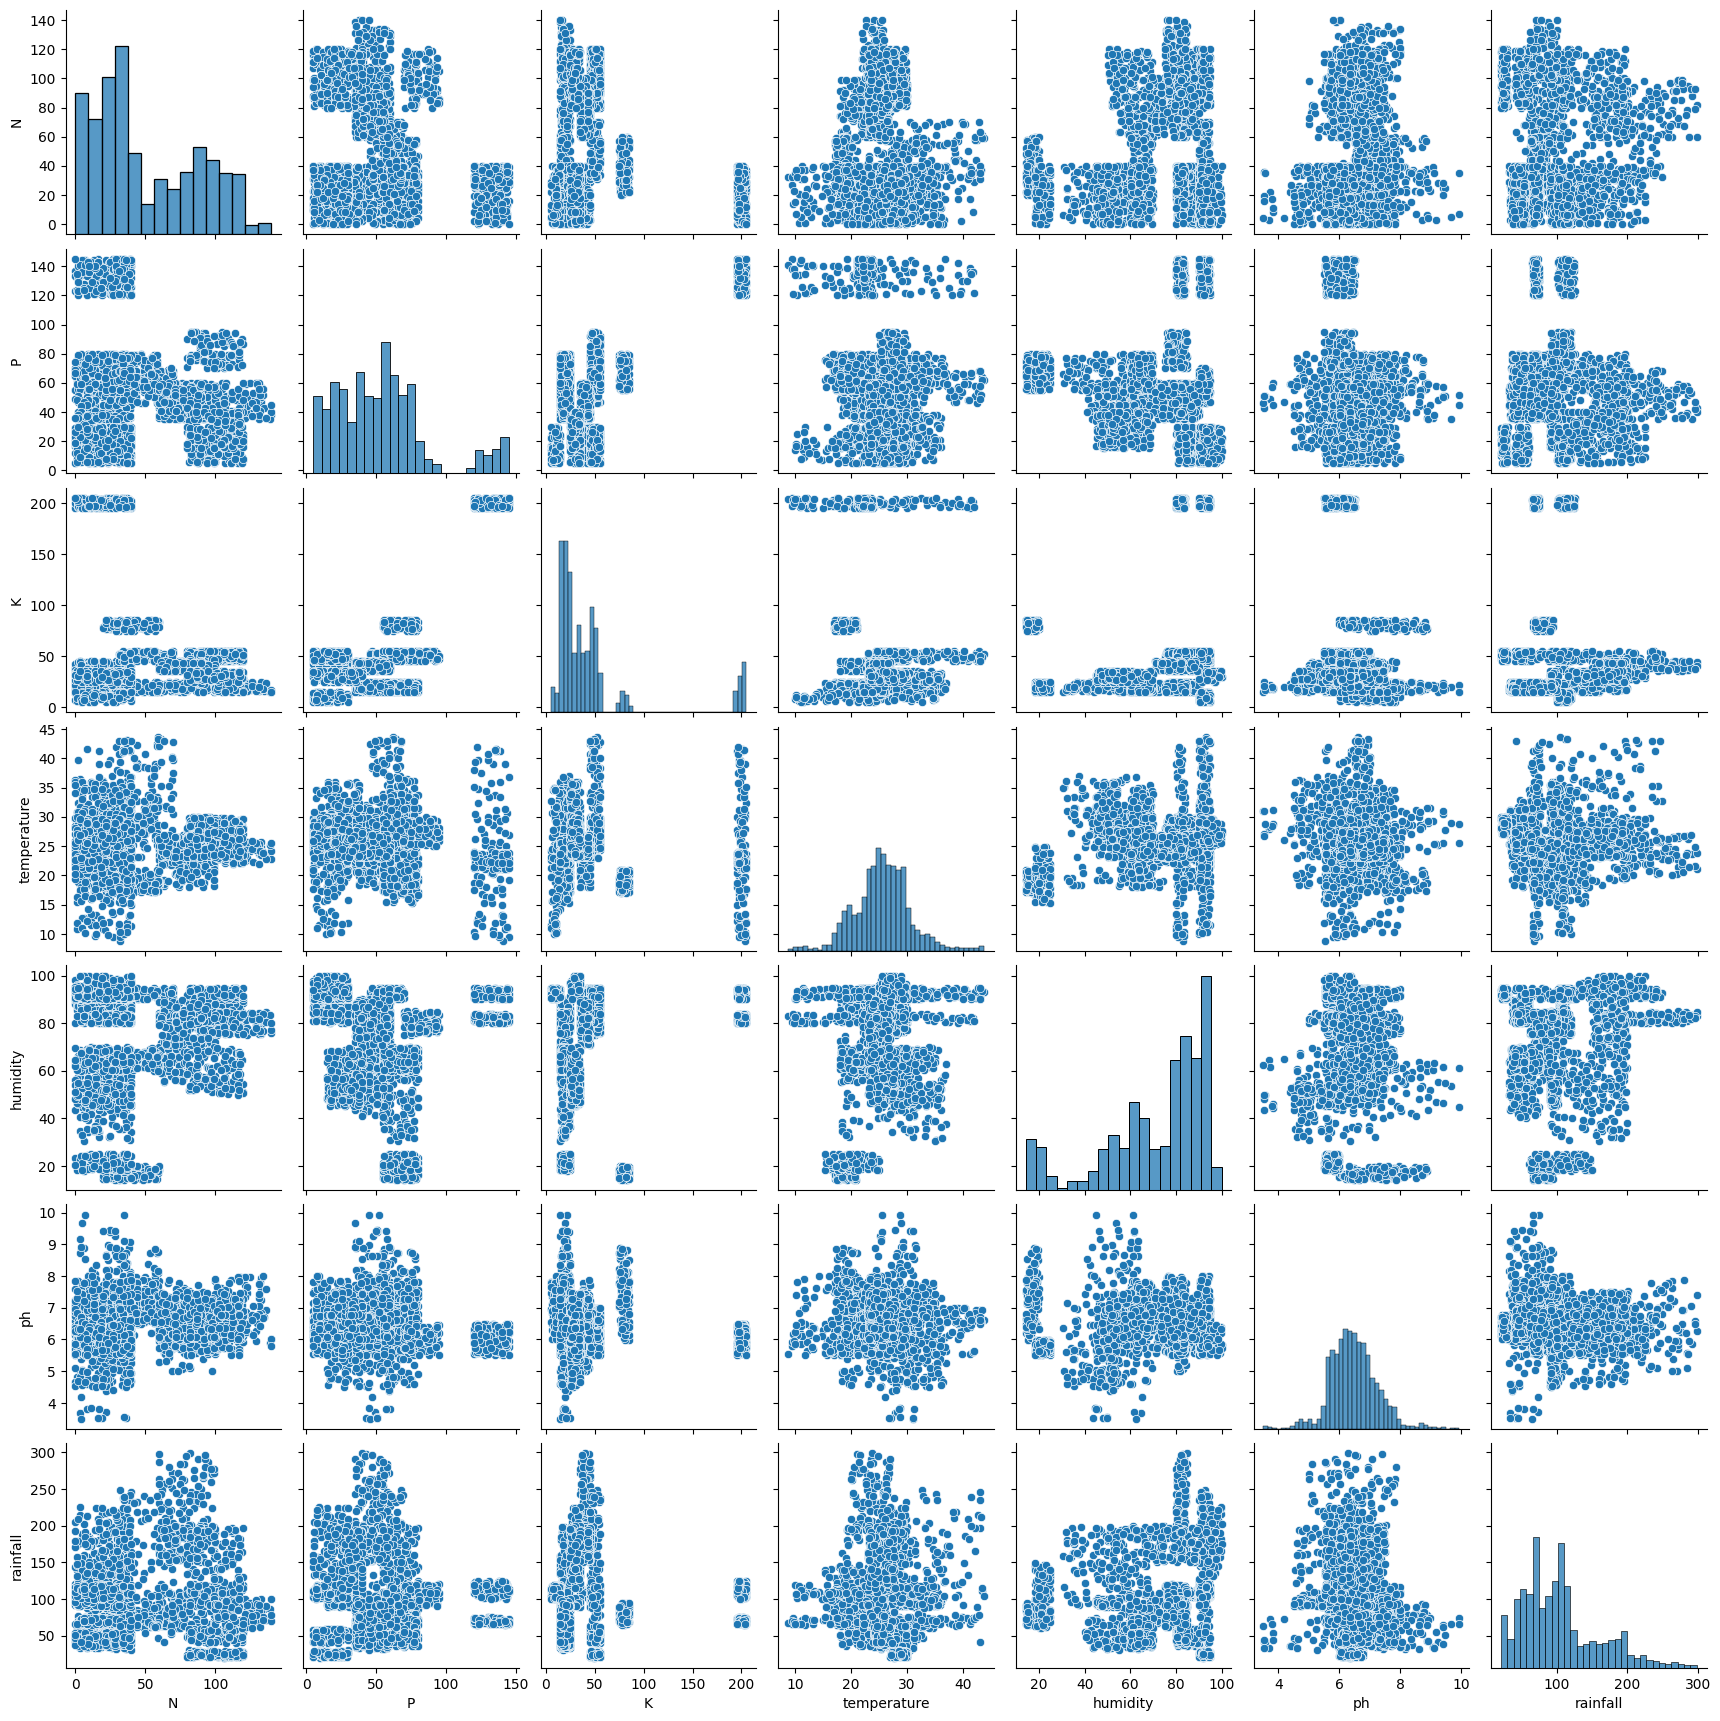

In [12]:
# Plotting the pair plot for numerical features
sns.pairplot(data_without_label)
plt.show()

<Axes: >

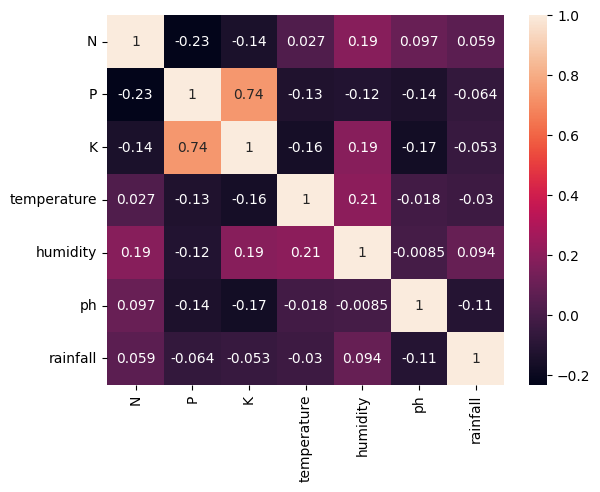

In [13]:
# Plotting the heatmap for the correlation matrix of numerical features
sns.heatmap(data_without_label.corr(), annot=True)


With the plots of pair plot and heatmap, we observe that there is no correlation between the features. Therefore, we don't need to eliminate any feature from the dataset.

## Data Preprocessing

###### Handling Missing Valuse

In [14]:
missing_values = crop_recommendation_data.isnull().sum()
missing_values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In our dataset, there are no missing values, so there is no need to handle them.
The dataset contains no categorical values, eliminating the need for encoding. Therefore, no further preprocessing steps are required for the loaded dataset.

In [15]:
# Split the data into features (X) and target variable (y)
features = crop_recommendation_data.drop(['label'], axis = 1)
target = crop_recommendation_data['label']


###### Feature Scaling

In [16]:
# Feature scaling the numerical values to facilitate training for sensitive algorithms.
# Using Min-Max scaling to transform the features between 0 and 1.

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical features
features_scaled = scaler.fit_transform(features)


In [17]:
# Save the scaler using pickle
with open('../app/models/minmax_scaler.pkl', 'wb') as file:
    pickle.dump(scaler,file)

In [18]:
# Creating a new DataFrame with feature scaling 
features_dataframe_scaled = pd.DataFrame(features_scaled, columns=features.columns)

## Splitting Data into Training and Testing Sets

In [19]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features_dataframe_scaled, target, test_size=0.2, random_state=42)

In [20]:
# Print the shapes of the resulting sets
print("Training Set - X:", X_train.shape)
print("Training Set - y:", y_train.shape)
print("Testing Set - X:", X_test.shape)
print("Testing Set - y:", y_test.shape)

Training Set - X: (1760, 7)
Training Set - y: (1760,)
Testing Set - X: (440, 7)
Testing Set - y: (440,)


## Model Buidling and Evaluation

In [21]:
#To store accuracy of model over 
accuracy_over_testdata = []
# To store various models trained
model_names = []

def crop_recommendation(algorithm, X_train, X_test, y_train, y_test):
    model_name = type(algorithm).__name__
    model_names.append(model_name)
    
    algorithm.fit(X_train, y_train)
    predictions = algorithm.predict(X_test)
    
    # Compute accuracy scores
    accuracy = accuracy_score(y_test, predictions)
    
    #Print performance metrics for test data
    print("Algorithm:", model_name)
    print("\n Accuracy Score Over Test Data:", accuracy)
    print("\n Classification Report for Test Data:\n" ,classification_report(y_test, predictions) )
    accuracy_over_testdata.append(accuracy)
    
    # Print cross-validation score
    print("\n Cross Validation Score:\n", cross_val_score(algorithm, features_dataframe_scaled, target, cv=4, scoring = "accuracy"))

### LogisticRegression

In [22]:
#Baseline model
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

#Train and Evaluate
crop_recommendation(logistic_model, X_train, X_test, y_train, y_test)


Algorithm: LogisticRegression

 Accuracy Score Over Test Data: 0.9454545454545454

 Classification Report for Test Data:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.74      1.00      0.85        17
      grapes       1.00      1.00      1.00        14
        jute       0.94      0.70      0.80        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.71      0.83        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       0.90      1.00      0.95        19
   muskmelon 

In [23]:
# #saving the random forest classifier model
with open('../app/models/crop_recommendationlog2.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

#### Decision Tree 

In [24]:
# Baseline model
decision_tree_model = DecisionTreeClassifier(min_samples_split=10, random_state=42)

#Train and Evaluate
crop_recommendation(decision_tree_model, X_train, X_test, y_train, y_test)


Algorithm: DecisionTreeClassifier

 Accuracy Score Over Test Data: 0.9818181818181818

 Classification Report for Test Data:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskme

In [25]:
# #saving the random forest classifier model
with open('../app/models/crop_recommendation2.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

#### Random Forest 

In [26]:
# Create a Random Forest model
random_forest_model = RandomForestClassifier(
    random_state=44,
    n_estimators=10,  # Adjust the number of trees
    max_depth=10,      # Limit the maximum depth
    min_samples_split=5,  # Increase the minimum samples required to split
    min_samples_leaf=2,   # Increase the minimum samples required at a leaf
    max_features='sqrt'   # Use the square root of the number of features
)

#Train and Evaluate
crop_recommendation(random_forest_model, X_train, X_test, y_train, y_test)

Algorithm: RandomForestClassifier

 Accuracy Score Over Test Data: 0.9931818181818182

 Classification Report for Test Data:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskme

In [27]:
# #saving the random forest classifier model
with open('../app/models/crop_recommendation.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

##### Support Vector Machine (SVM)

In [28]:
#create a Support Vector Machine (SVM) Model
svm_model = SVC(C=1.0, kernel='rbf', random_state=42)

#Train and Evaluate
crop_recommendation(svm_model, X_train, X_test, y_train, y_test)

Algorithm: SVC

 Accuracy Score Over Test Data: 0.9681818181818181

 Classification Report for Test Data:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00     

## Model performances

C:\Users\KOWSHIKA D\AppData\Local\Temp\ipykernel_22332\996321119.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Test Accuracy', y='Model', data=df, palette=colors)


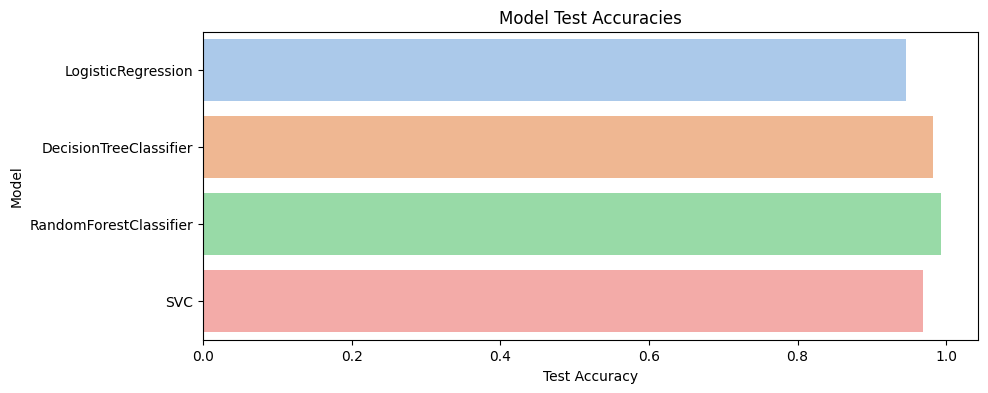

In [30]:
# Create a DataFrame for easy plotting with Seaborn
df = pd.DataFrame({'Model': model_names, 'Test Accuracy': accuracy_over_testdata})

# Define a custom color palette
colors = sns.color_palette("pastel", len(model_names))


# Create a horizontal bar plot using Seaborn with different colors for each model
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Test Accuracy', y='Model', data=df, palette=colors)

# Customize the plot
ax.set_title('Model Test Accuracies')
ax.set_xlabel('Test Accuracy')

# Show the plot
plt.show()


After comparing accuracies across different models, we've chosen to deploy the project using the Random Forest classifier.

### Prediction for  a new value

In [31]:
# Loading the Random Forest Model
with open('../app/models/crop_recommendationlog2.pkl', 'rb') as file:
    model_loaded = pickle.load(file)

# Loading MinMaxScaler
with open('../app/models/minmax_scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

new_data = [[71, 41, 43, 22.3, 80, 6, 200]]
# Applying MinMaxScaling to new data
scaled_data = scaler.transform(new_data)  # Use transform, not fit_transform

# Predicting for new value with the loaded model
prediction = model_loaded.predict(scaled_data)

# Print the prediction
print("Predicted Crop:", prediction)


Predicted Crop: ['rice']


## Conclusion 

In this notebook, we explored the task of crop recommendation using machine learning. We started by analyzing the dataset, preprocessing the data, and then training various models to predict the recommended crop based on given features.

#### Best Model

After evaluating several models, the  Random Forest Classifier demonstrated superior performance in terms of accuracy.

#### Recommendations

Our recommendation for deploying a crop recommendation system is to utilize the Random Forest Classifier model. This model exhibited robust performance during our analysis and can provide reliable predictions for crop recommendations.
